# Model Inference

### Names:
- Idan Dunsky, 319070595
- Yaniv Kaveh Shtul, 206768004

#Imports and Installations


In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 24.3 MB/s eta 0:00:00


In [2]:
import os
import cv2
import random
import torch
import ultralytics
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from ultralytics import YOLO
from google.colab import drive
from transformers import AutoProcessor, AutoModelForCausalLM
from google.colab import files
%matplotlib inline

random.seed(42)

# Mount Google Drive

In [3]:
drive.mount('/content/drive')

# Define paths for train, validation, logging directories and models
BASE_PATH = '/content/drive/MyDrive/SoftwareEngDegree/Computer_Vision/Pet_and_People_Rec_Project/'
IMAGES_PATH = os.path.join(BASE_PATH, 'flickr30k_filtered_images')

# Train Directory
TRAIN_PATH = os.path.join(BASE_PATH, 'dataset/train/')
TRAIN_IMAGES_PATH = os.path.join(TRAIN_PATH, 'images/')
TRAIN_LABELS_PATH = os.path.join(TRAIN_PATH, 'labels/')

# Validation Directory
VAL_PATH = os.path.join(BASE_PATH, 'dataset/val/')
VAL_IMAGES_PATH = os.path.join(VAL_PATH, 'images/')
VAL_LABELS_PATH = os.path.join(VAL_PATH, 'labels/')

# Model with Augmentations Directory
AUG_PATH = os.path.join(BASE_PATH, 'augmented/')
AUG_LOG_PATH = os.path.join(AUG_PATH, 'log/')
AUG_MODEL_PATH = os.path.join(AUG_PATH, 'model_with_augmentations.pt')

# Create directories if they don't exist
os.makedirs(BASE_PATH, exist_ok=True)
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(TRAIN_PATH, exist_ok=True)
os.makedirs(VAL_PATH, exist_ok=True)
os.makedirs(TRAIN_IMAGES_PATH, exist_ok=True)
os.makedirs(VAL_IMAGES_PATH, exist_ok=True)
os.makedirs(TRAIN_LABELS_PATH, exist_ok=True)
os.makedirs(VAL_LABELS_PATH, exist_ok=True)
os.makedirs(AUG_PATH, exist_ok=True)
os.makedirs(AUG_LOG_PATH, exist_ok=True)

Mounted at /content/drive


# Load Our trained Model

In [4]:
device = torch.device('cuda')

aug_model_best_weights = os.path.join(AUG_LOG_PATH, 'train/weights/best.pt')
model = YOLO(aug_model_best_weights)
model.to(device)
model.info()

Model summary: 225 layers, 3,011,238 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011238, 0, 8.1952256)

# Create Test Set
We have a large collection of images; however, some have been utilized for both training and validation. To address this, we will create a subset of images that have not been used in either training or validation, ensuring that the model has not been exposed to them. We will then select an image from this subset for inference.

In [11]:
# All the images that we have
images_path_file_names = os.listdir(IMAGES_PATH)

# images used in Validation set
val_images_path_file_names = os.listdir(VAL_IMAGES_PATH)

# images used in Trainig set
train_images_path_file_names = os.listdir(TRAIN_IMAGES_PATH)


# creating our new test set
test_images = [image for image in images_path_file_names if image not in train_images_path_file_names and image not in val_images_path_file_names]
len(test_images)

224

# Read Random Image

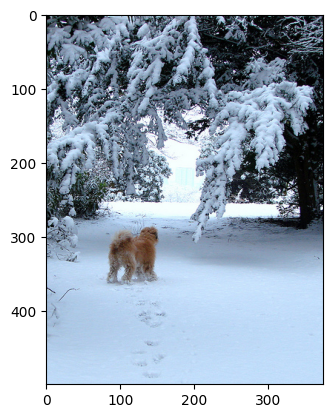

In [40]:
image_name = random.choice(test_images)
image_path = os.path.join(IMAGES_PATH, image_name)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#Inference


0: 640x480 1 pet, 8.6ms
Speed: 3.1ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


array([[[ 23,  48,  53],
        [  6,  23,  33],
        [  1,  12,   4],
        ...,
        [128, 135, 164],
        [ 93,  75, 115],
        [168, 165, 186]],

       [[ 21,  32,  26],
        [  2,   9,   2],
        [  5,   5,   5],
        ...,
        [143, 182, 189],
        [185, 201, 214],
        [168, 184, 200]],

       [[  6,  16,   7],
        [  7,   4,   0],
        [  0,   3,   5],
        ...,
        [ 99, 146, 174],
        [ 86, 156, 164],
        [ 54, 104, 111]],

       ...,

       [[193, 220, 247],
        [191, 221, 249],
        [192, 223, 251],
        ...,
        [196, 223, 253],
        [197, 222, 253],
        [195, 222, 252]],

       [[194, 221, 250],
        [192, 222, 250],
        [192, 223, 251],
        ...,
        [193, 222, 252],
        [193, 222, 252],
        [192, 221, 251]],

       [[191, 218, 248],
        [191, 220, 250],
        [192, 223, 252],
        ...,
        [191, 222, 251],
        [191, 222, 251],
        [190, 221, 250]]], dtype=uint8)
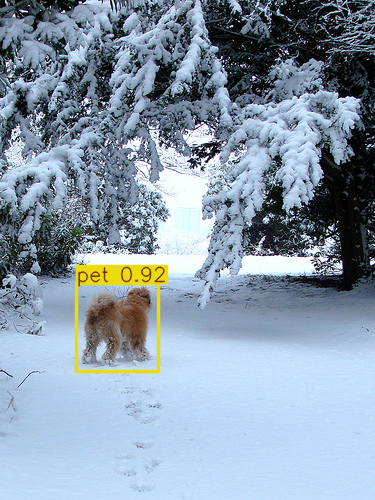

In [41]:
results = model(image)
results[0].plot()